In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r'/content/Classified Data')
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [27]:
from sklearn .preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(df.drop('FDJ',axis=1))

StandardScaler()

In [30]:
scaled_features = scaler.transform(df.drop('FDJ',axis=1))

In [31]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE  NXJ  
0 -1.482368 -0.949719 -0.643314  1.0  
1 -0.202240 -1.828051  0.636759 -1.0  
2  0.285707 -0.682494 -0.377850 -1.0  
3  1.066491  1.241325 -1.026987  1.0  
4 -1.472352  1.040772  0.276510  1.0

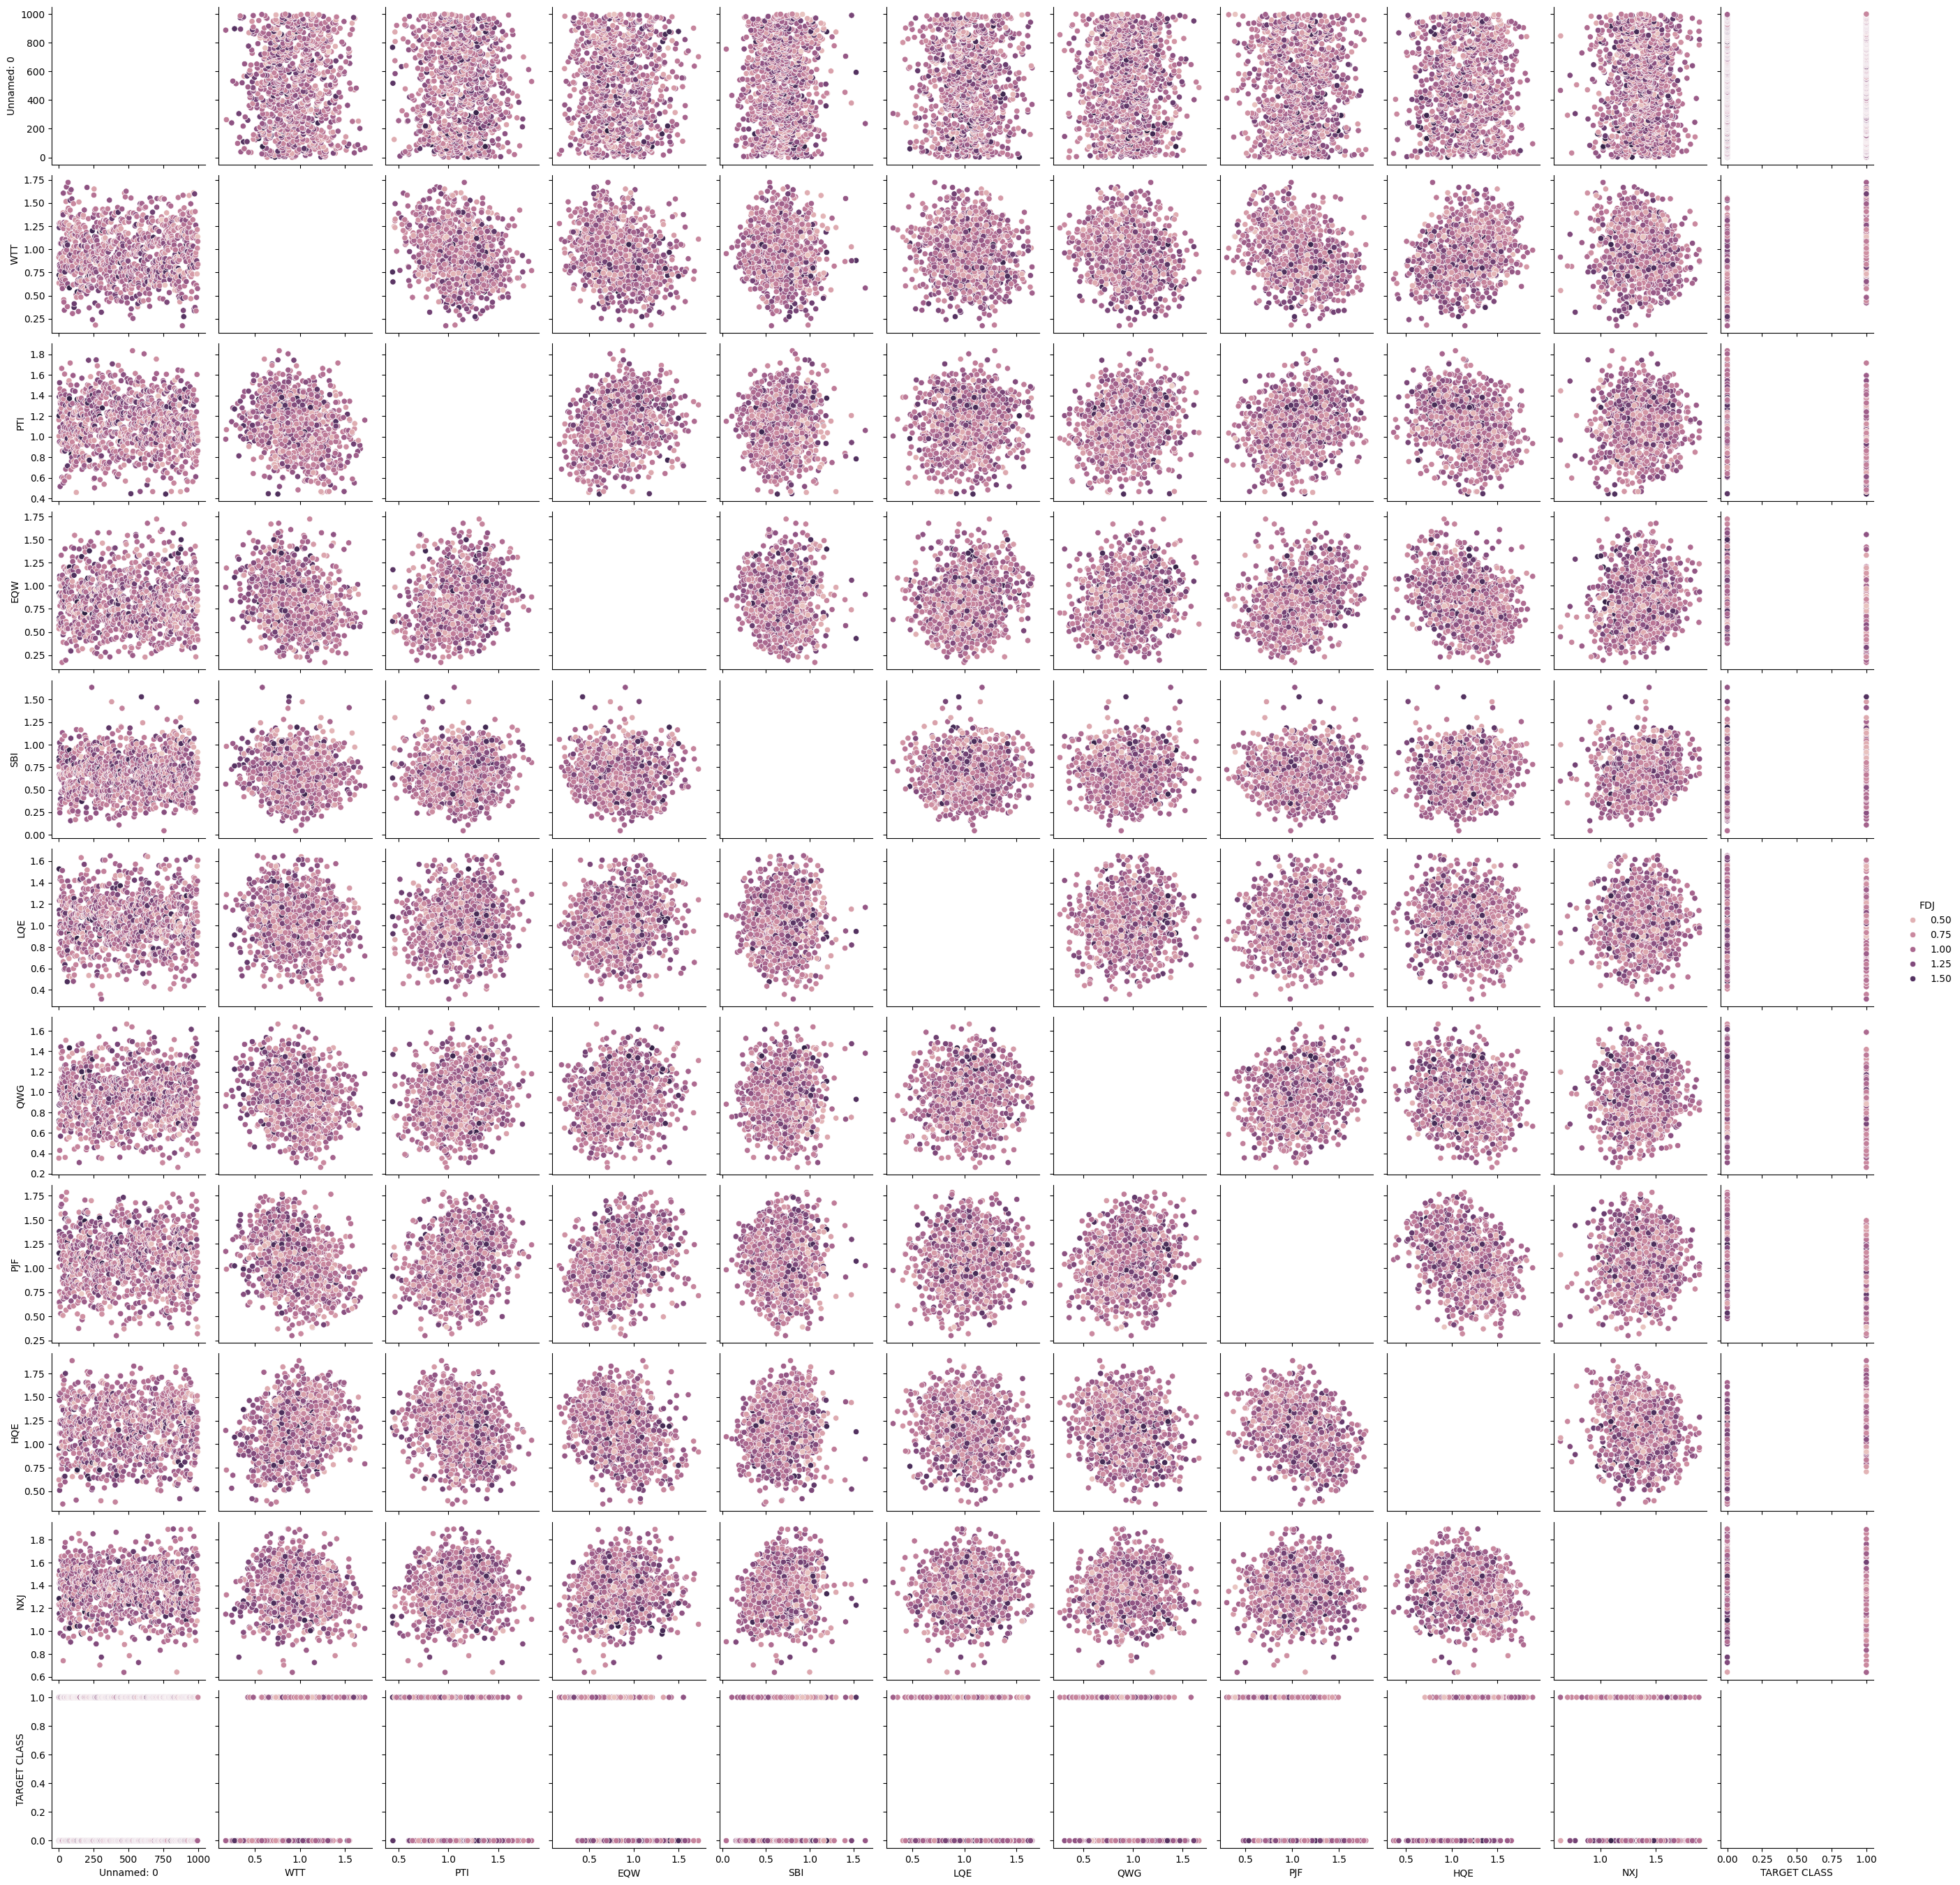

In [32]:
sns.pairplot(df,hue='FDJ')

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
pred = knn.predict(x_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [51]:
print(confusion_matrix(y_test,pred))

[[150   1]
 [  0 149]]


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [57]:
accuracy_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [62]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

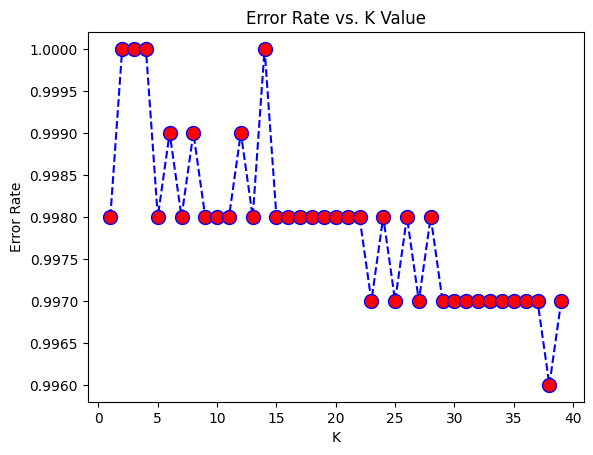

In [68]:
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[150   1]
 [  0 149]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [70]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[150   1]
 [  0 149]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       149

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

